##Методические указания

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [111]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")


In [112]:
data.head()


,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [113]:
X = data.x
y = data.y


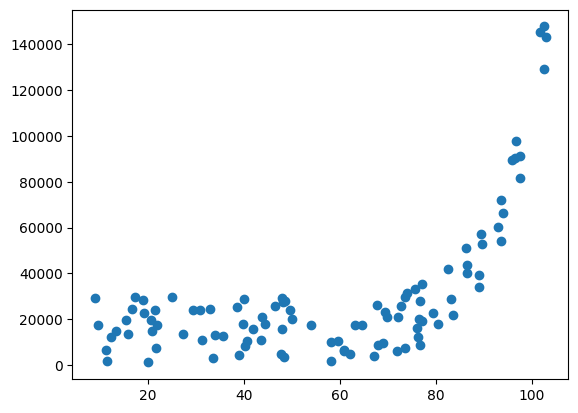

In [114]:
plt.scatter(X, y)


In [115]:
X = pd.DataFrame(X)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


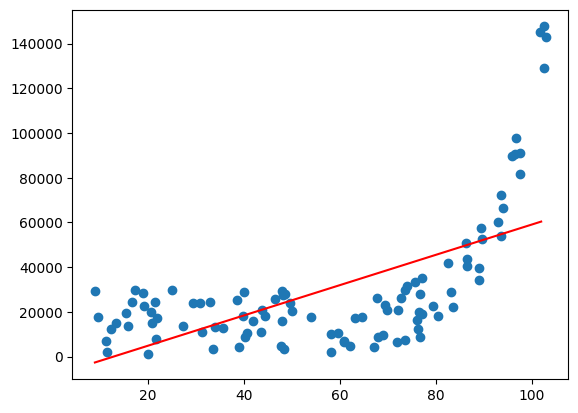

In [116]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X, y)

X = pd.DataFrame(X)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')


In [117]:
linear.score(X, y)


0.37467360318911636

In [118]:
from sklearn.preprocessing import PolynomialFeatures

transformation = PolynomialFeatures(degree=2)

transformation.fit(X)

X_2 = transformation.transform(X)

In [119]:
X_2.shape
X_2[:5]


array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

In [120]:
poly_2d = LinearRegression().fit(X_2, y)


In [121]:
xx_2d = transformation.transform(pd.DataFrame(xx))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


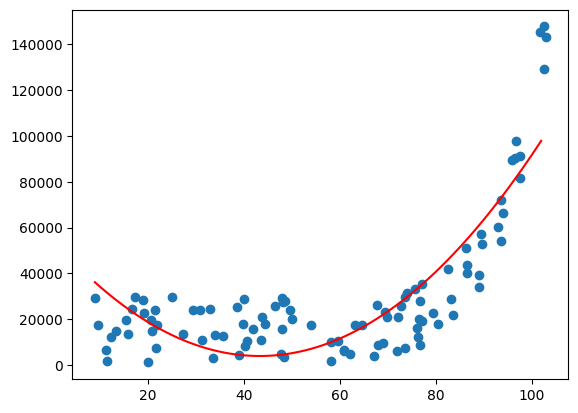

In [122]:
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')


In [123]:
poly_2d.score(X_2, y)


0.7359753787024842

In [124]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)


In [125]:
y = data.y
X = data.drop(["y"], axis=1)


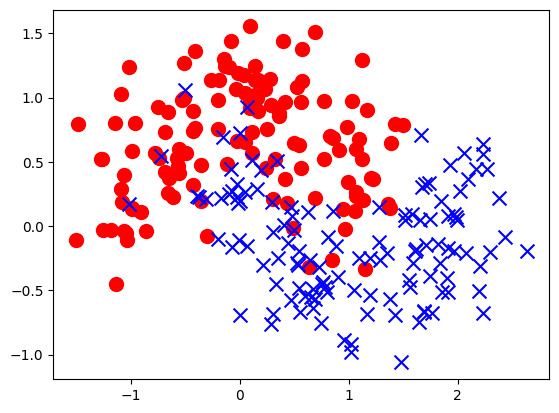

In [126]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


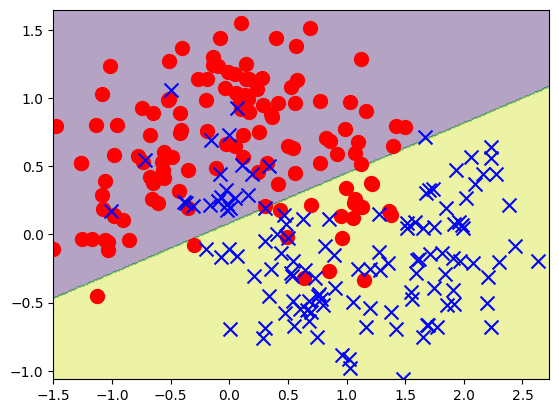

In [127]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)


In [128]:
logistic.score(X, y)


0.832

In [129]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)


In [130]:
X_3.shape


(250, 9)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


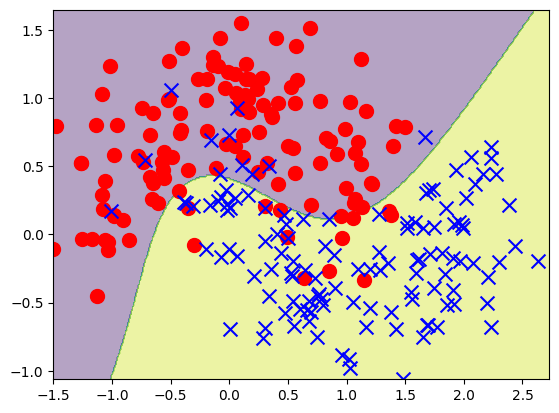

In [131]:
class_3 = LogisticRegression().fit(X_3, y)

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)


In [132]:
class_3.score(X_3, y)


0.9

In [133]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape


(21613, 21)

In [134]:
data_kc_prices.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [135]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)


In [136]:
X_kc_prices.shape, y_kc_prices.shape


((21613, 18), (21613,))

In [137]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)


0.699747189010915

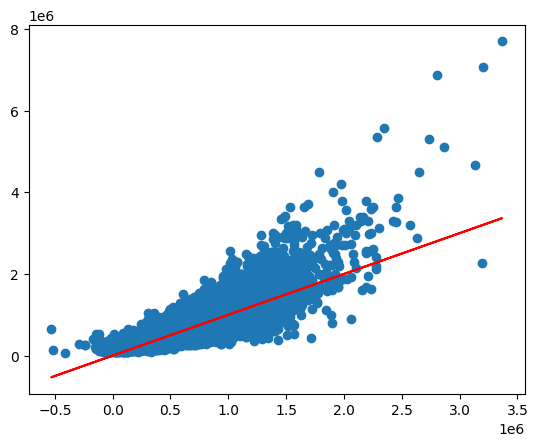

In [138]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [139]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)


In [140]:
X_3_kc_prices.shape


(21613, 1330)

In [141]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)


0.8650781867438108

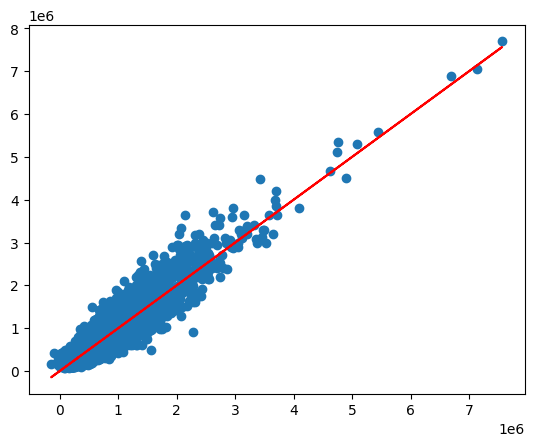

In [142]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')


##Задания для самостоятельного выполнения

#### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [143]:
import time


#### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


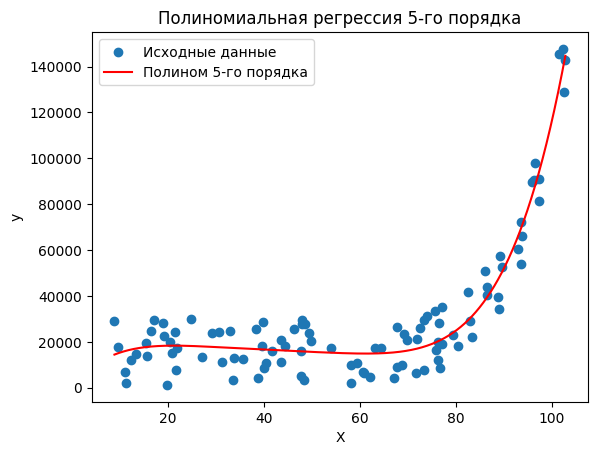

Модель 5-го порядка:
  Время обучения: 0.0015 секунд
  Коэффициент детерминации: 0.9217



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


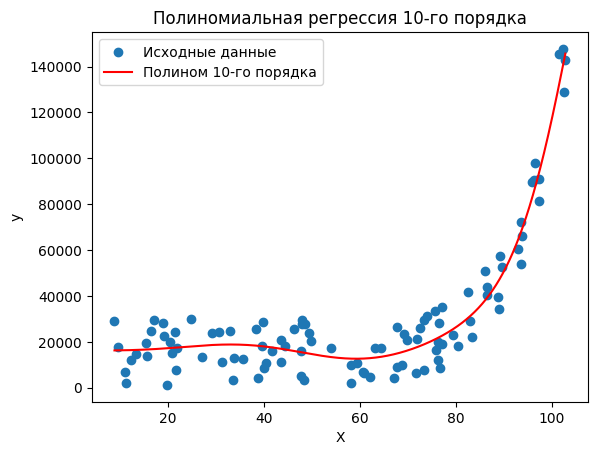

Модель 10-го порядка:
  Время обучения: 0.0023 секунд
  Коэффициент детерминации: 0.9232



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


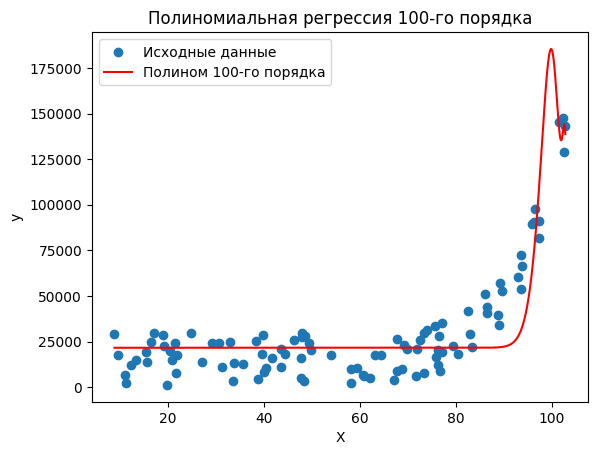

Модель 100-го порядка:
  Время обучения: 0.0101 секунд
  Коэффициент детерминации: 0.7925



In [144]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

X = pd.DataFrame(data.x)
y = data.y

# Построение моделей и измерение времени обучения
degrees = [5, 10, 100]
for degree in degrees:
    # Полиномиальное преобразование данных
    transformation = PolynomialFeatures(degree=degree)
    X_transformed = transformation.fit_transform(X)

    # Обучение модели
    start_time = time.time()
    poly_model = LinearRegression().fit(X_transformed, y)
    end_time = time.time()

    # Оценка эффективности
    score = poly_model.score(X_transformed, y)

    # Вывод графика
    xx_poly = np.arange(X.x.min(), X.x.max(), 0.01).reshape(-1, 1)
    xx_poly_transformed = transformation.transform(xx_poly)
    yy_poly = poly_model.predict(xx_poly_transformed)

    plt.scatter(X, y, label='Исходные данные')
    plt.plot(xx_poly, yy_poly, c='r', label=f'Полином {degree}-го порядка')
    plt.title(f'Полиномиальная регрессия {degree}-го порядка')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    print(f"Модель {degree}-го порядка:")
    print(f"  Время обучения: {end_time - start_time:.4f} секунд")
    print(f"  Коэффициент детерминации: {score:.4f}\n")


####3. То же самое проделайте с датасетом для классификации и "King county".

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


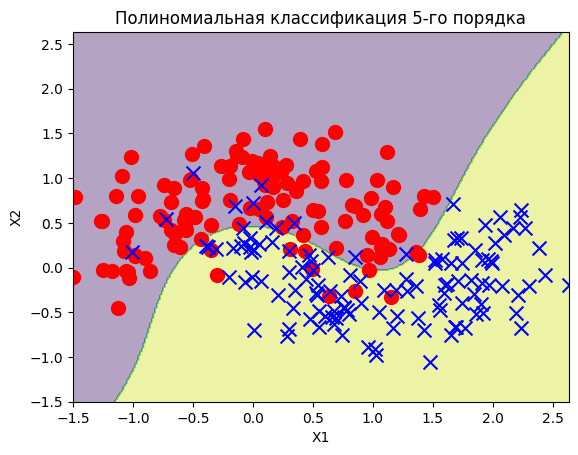

Модель 5-го порядка:
  Время обучения: 0.0153 секунд
  Точность: 0.9160



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


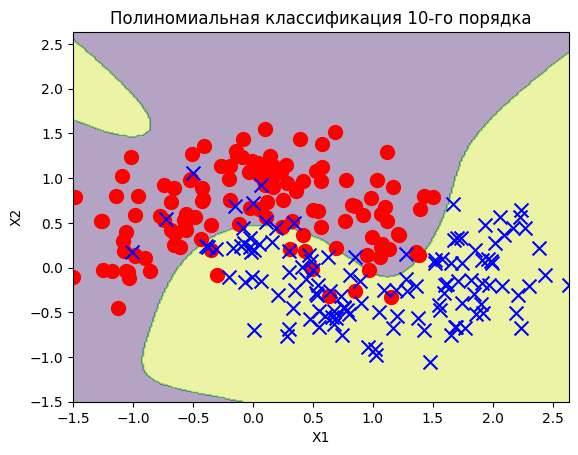

Модель 10-го порядка:
  Время обучения: 0.0653 секунд
  Точность: 0.9240



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


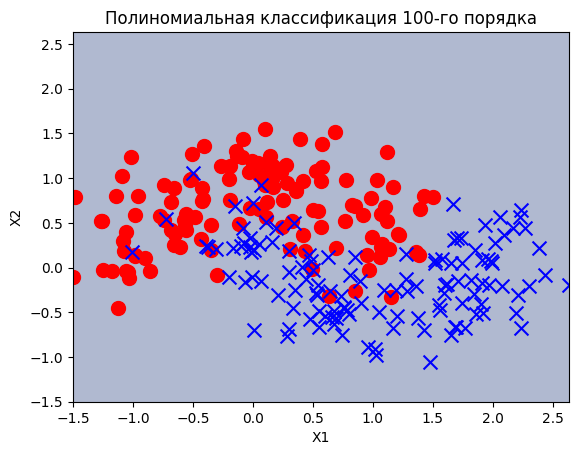

Модель 100-го порядка:
  Время обучения: 0.0963 секунд
  Точность: 0.5000



In [145]:
from sklearn.metrics import accuracy_score

# Загрузка данных
data_classification = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)

y_classification = data_classification.y
X_classification = data_classification.drop(["y"], axis=1)

# Построение моделей и измерение времени обучения
degrees_classification = [5, 10, 100]
for degree in degrees_classification:
    # Полиномиальное преобразование данных
    class_transform = PolynomialFeatures(degree=degree, include_bias=False)
    X_transformed_class = class_transform.fit_transform(X_classification)

    # Обучение модели
    start_time = time.time()
    class_model = LogisticRegression().fit(X_transformed_class, y_classification)
    end_time = time.time()

    # Оценка эффективности
    accuracy = accuracy_score(y_classification, class_model.predict(X_transformed_class))

    # Вывод графика
    xx_class = np.linspace(X_classification.min().min(), X_classification.max().max(), 300)
    yy_class = np.linspace(X_classification.min().min(), X_classification.max().max(), 300)
    xx_class, yy_class = np.meshgrid(xx_class, yy_class)
    XX_class = np.c_[xx_class.ravel(), yy_class.ravel()]
    Z_class = class_model.predict(class_transform.transform(XX_class)).reshape(xx_class.shape)

    plt.contourf(xx_class, yy_class, Z_class, alpha=0.4)
    plt.scatter(X_classification.iloc[:, 0][y_classification == 0], X_classification.iloc[:, 1][y_classification == 0], marker="o", c='r', s=100)
    plt.scatter(X_classification.iloc[:, 0][y_classification == 1], X_classification.iloc[:, 1][y_classification == 1], marker="x", c='b', s=100)
    plt.title(f'Полиномиальная классификация {degree}-го порядка')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

    print(f"Модель {degree}-го порядка:")
    print(f"  Время обучения: {end_time - start_time:.4f} секунд")
    print(f"  Точность: {accuracy:.4f}\n")


Модель 3-го порядка:
  Время обучения: 0.0286 секунд
  Коэффициент детерминации: 0.7591



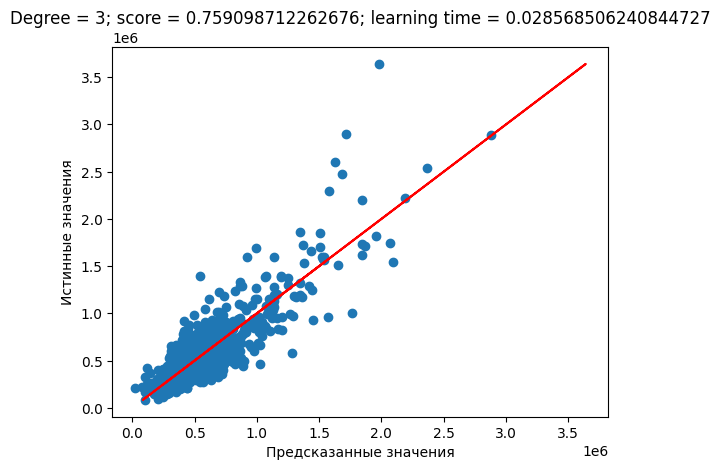

Модель 5-го порядка:
  Время обучения: 0.8649 секунд
  Коэффициент детерминации: 0.8822



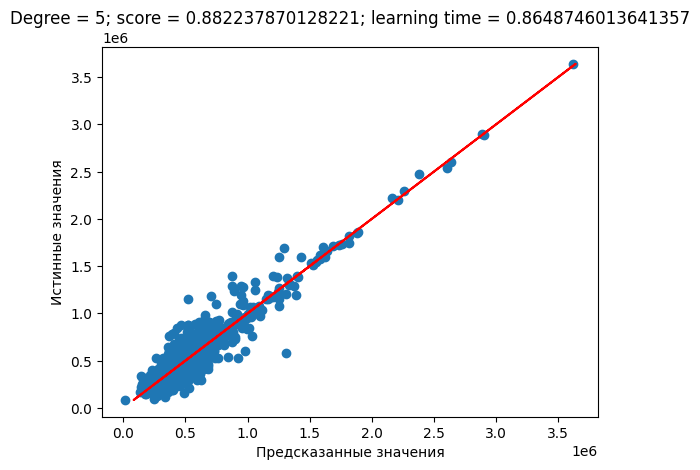

Модель 7-го порядка:
  Время обучения: 2.5658 секунд
  Коэффициент детерминации: 0.4504



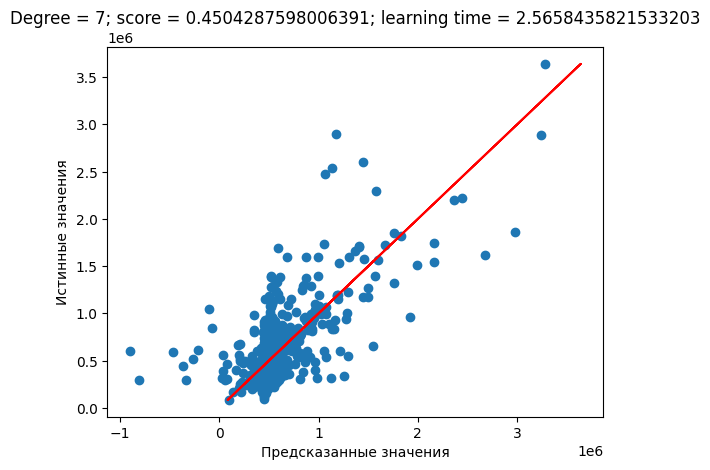

In [146]:
from sklearn.metrics import r2_score
from sklearn.utils import shuffle

# Загрузка данных
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Выборка данных и уменьшение размера
sample_size = 1000
data_kc_prices_sampled = shuffle(data_kc_prices)[:sample_size]

y_kc_prices = data_kc_prices_sampled.price
X_kc_prices = data_kc_prices_sampled.drop(["id", "date", "price", "yr_renovated", "zipcode", "condition", "grade", "floors", "long", "view", "bedrooms", "bathrooms", "waterfront"], axis=1)

# Построение моделей и измерение времени обучения
degrees_kc_prices = [3, 5, 7]  # Уменьшим степени полинома
for degree in degrees_kc_prices:
    # Полиномиальное преобразование данных
    poly_features_kc_prices = PolynomialFeatures(degree=degree, include_bias=False)
    X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

    # Обучение модели
    start_time = time.time()
    poly_model_kc_prices = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
    end_time = time.time()

    # Оценка эффективности
    r2 = r2_score(y_kc_prices, poly_model_kc_prices.predict(X_3_kc_prices))

    print(f"Модель {degree}-го порядка:")
    print(f"  Время обучения: {end_time - start_time:.4f} секунд")
    print(f"  Коэффициент детерминации: {r2:.4f}\n")

    # График предсказаний
    y_pred_kc_prices = poly_model_kc_prices.predict(X_3_kc_prices)
    plt.scatter(y_pred_kc_prices, y_kc_prices)
    plt.plot(y_kc_prices, y_kc_prices, c='r')

    plt.title(f'Degree = {degree}; score = {poly_model_kc_prices.score(X_3_kc_prices, y_kc_prices)}; learning time = {end_time - start_time}')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()


#### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [147]:
data_regression = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")

# Выборка данных для регрессии и уменьшение размера
sample_size_regression = 100
data_regression_sampled = shuffle(data_regression)[:sample_size_regression]

X_regression = data_regression_sampled.x.values.reshape(-1, 1)
y_regression = data_regression_sampled.y.values

data_classification = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv")

# Выборка данных для классификации и уменьшение размера
sample_size_classification = 250
data_classification_sampled = shuffle(data_classification)[:sample_size_classification]

y_classification = data_classification_sampled.y.values
X_classification = data_classification_sampled.drop("y", axis=1).values

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Выборка данных для регрессии на реальных данных и уменьшение размера
sample_size_kc_prices = 1000
data_kc_prices_sampled = shuffle(data_kc_prices)[:sample_size_kc_prices]

y_kc_prices = data_kc_prices_sampled.price
X_kc_prices = data_kc_prices_sampled.drop(["id", "date", "price", "yr_renovated", "zipcode", "condition", "grade", "floors", "long", "view", "bedrooms", "bathrooms", "waterfront"], axis=1)

results = []

# Регрессия
degrees_regression = [2, 5, 10]
for degree in degrees_regression:
    poly_features_regression = PolynomialFeatures(degree=degree, include_bias=False)
    X_3_regression = poly_features_regression.fit_transform(X_regression)

    start_time = time.time()
    poly_model_regression = LinearRegression().fit(X_3_regression, y_regression)
    end_time = time.time()

    r2_regression = r2_score(y_regression, poly_model_regression.predict(X_3_regression))

    results.append({
        'Task': 'Regression',
        'Degree': degree,
        'Time': end_time - start_time,
        'R2 Score': r2_regression
    })

# Классификация
degrees_classification = [2, 3, 5]
for degree in degrees_classification:
    poly_features_classification = PolynomialFeatures(degree=degree, include_bias=False)
    X_3_classification = poly_features_classification.fit_transform(X_classification)

    start_time = time.time()
    poly_model_classification = LogisticRegression().fit(X_3_classification, y_classification)
    end_time = time.time()

    accuracy_classification = accuracy_score(y_classification, poly_model_classification.predict(X_3_classification))

    results.append({
        'Task': 'Classification',
        'Degree': degree,
        'Time': end_time - start_time,
        'Accuracy': accuracy_classification
    })

# Регрессия на реальных данных
degrees_kc_prices = [3, 5, 7]
for degree in degrees_kc_prices:
    poly_features_kc_prices = PolynomialFeatures(degree=degree, include_bias=False)
    X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

    start_time = time.time()
    poly_model_kc_prices = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
    end_time = time.time()

    r2_kc_prices = r2_score(y_kc_prices, poly_model_kc_prices.predict(X_3_kc_prices))

    results.append({
        'Task': 'Regression on Real Data',
        'Degree': degree,
        'Time': end_time - start_time,
        'R2 Score': r2_kc_prices
    })

results_df = pd.DataFrame(results)
print(results_df)


                      Task  Degree      Time  R2 Score  Accuracy
0               Regression       2  0.001856  0.735975       NaN
1               Regression       5  0.001722  0.921748       NaN
2               Regression      10  0.002975  0.923200       NaN
3           Classification       2  0.014245       NaN     0.804
4           Classification       3  0.013587       NaN     0.792
5           Classification       5  0.017212       NaN     0.820
6  Regression on Real Data       3  0.017480  0.761155       NaN
7  Regression on Real Data       5  0.771631  0.917026       NaN
8  Regression on Real Data       7  2.216644  0.817829       NaN


#### 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [148]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Выборка данных и уменьшение размера
sample_size = 1000
data_kc_prices_sampled = data_kc_prices.sample(sample_size, random_state=42)

y_kc_prices = data_kc_prices_sampled.price
X_kc_prices = data_kc_prices_sampled.drop(["id", "date", "price", "yr_renovated", "zipcode", "condition", "grade", "floors", "long", "view", "bedrooms", "bathrooms", "waterfront"], axis=1)

# Построение линейной модели
linear_model_kc_prices = LinearRegression().fit(X_kc_prices, y_kc_prices)

# Вывод коэффициентов и соответствующих атрибутов
coefficients = linear_model_kc_prices.coef_
attributes = X_kc_prices.columns

coefficients_df = pd.DataFrame({'Attribute': attributes, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("Коэффициенты модели:")
print(coefficients_df)


Коэффициенты модели:
       Attribute    Coefficient
5            lat  590734.287167
0    sqft_living     139.551396
6  sqft_living15     108.323001
2     sqft_above      98.090547
3  sqft_basement      41.460850
1       sqft_lot       0.468919
7     sqft_lot15      -1.140508
4       yr_built   -2397.436477


#### 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [149]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

# Выборка данных и уменьшение размера
sample_size = 1000
data_kc_prices_sampled = shuffle(data_kc_prices)[:sample_size]

y_kc_prices = data_kc_prices_sampled.price
X_kc_prices = data_kc_prices_sampled.drop(["id", "date", "price", "yr_renovated", "zipcode", "condition", "grade", "floors", "long", "view", "bedrooms", "bathrooms", "waterfront"], axis=1)

# Построение полиномиальной модели второго порядка
degree = 2
poly_features_kc_prices = PolynomialFeatures(degree=degree, include_bias=False)
X_2_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

poly_model_kc_prices = LinearRegression().fit(X_2_kc_prices, y_kc_prices)

# Вывод коэффициентов и соответствующих атрибутов
coefficients = poly_model_kc_prices.coef_
feature_names = poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns)

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

print("Коэффициенты полиномиальной модели второго порядка:")
print(coefficients_df)


Коэффициенты полиномиальной модели второго порядка:
                        Feature   Coefficient
0                   sqft_living  1.277503e+07
6                 sqft_living15  8.555575e+03
35                 yr_built lat  1.326131e+03
7                    sqft_lot15  2.090429e+02
13              sqft_living lat  1.852793e+02
26               sqft_above lat  1.112206e+02
31            sqft_basement lat  7.405557e+01
34                   yr_built^2  4.977855e+01
1                      sqft_lot  8.226387e+00
30       sqft_basement yr_built  1.800945e-01
12         sqft_living yr_built  1.152483e-01
11    sqft_living sqft_basement  5.139300e-02
29              sqft_basement^2  4.670470e-02
8                 sqft_living^2  4.588587e-02
37          yr_built sqft_lot15  2.848549e-02
32  sqft_basement sqft_living15  2.143239e-02
14    sqft_living sqft_living15  1.700865e-02
17          sqft_lot sqft_above  1.699322e-02
18       sqft_lot sqft_basement  1.322672e-02
41              sqft_living1